# Optimisez la gestion des données d'une boutique avec Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
erp = pd.read_excel('erp.xlsx')
liaison = pd.read_excel('liaison.xlsx')
web = pd.read_excel('web.xlsx')

C:\Users\steph\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Valeurs manquantes:

In [3]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [4]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [5]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [6]:
web.shape

(1513, 28)

In [7]:
# Des colonnes ne contiennent aucune donnée.
# Suppression des colonnes vides:
web.dropna(axis=1, how='all', inplace=True)

# Doublons:

In [8]:
erp.duplicated('product_id').sum()

0

In [9]:
print(liaison['product_id'].duplicated(keep=False).sum())
print(liaison['id_web'].duplicated(keep=False).sum())

0
91


In [10]:
doublons_liaison = liaison.loc[liaison['id_web'].duplicated(keep=False), 'id_web']
doublons_liaison.unique()
# Les doublons "liaison['id_web']" sont tous des NaN:

array([nan], dtype=object)

In [11]:
web.duplicated(keep=False).sum()

83

In [12]:
doublons_web = web.loc[web.duplicated(keep=False), :]
doublons_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
doublons_web.isnull().sum()
# Toutes les colonnes de 'doublons_web' sont nulles, sauf 3:

sku                  83
virtual               0
downloadable          0
rating_count          0
average_rating       83
total_sales          83
tax_status           83
post_author          83
post_date            83
post_date_gmt        83
post_title           83
post_excerpt         83
post_status          83
comment_status       83
ping_status          83
post_name            83
post_modified        83
post_modified_gmt    83
post_parent          83
guid                 83
menu_order           83
post_type            83
post_mime_type       83
comment_count        83
dtype: int64

In [14]:
print(web['virtual'].unique())
print(web['downloadable'].unique())
print(web['rating_count'].unique())
# Les colonnes non nulles ne contiennent que des 0.

[0]
[0]
[0]


In [15]:
# Aucune information utile dans ces 83 lignes, je les supprime:
web = web.drop_duplicates(keep=False)

# Recherche de clés uniques:

In [16]:
erp.shape

(825, 5)

In [17]:
erp['product_id'].unique().shape

(825,)

Pas de doublons dans 'erp['product_id']'

In [18]:
web.shape

(1430, 24)

In [19]:
web['sku'].unique().shape
# Le nombre de valeurs uniques est égal à exactement la moitié du nombre de lignes de 'web'. Hypothèse pour plus tard: chaque 'sku' apparaît 2 fois.

(715,)

In [20]:
web.dtypes

sku                          object
virtual                       int64
downloadable                  int64
rating_count                  int64
average_rating              float64
total_sales                 float64
tax_status                   object
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_status                  object
comment_status               object
ping_status                  object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
post_parent                 float64
guid                         object
menu_order                  float64
post_type                    object
post_mime_type               object
comment_count               float64
dtype: object

In [21]:
# Recherche de valeurs 'sku' problématiques:
web['sku1'] = pd.to_numeric(web['sku'], errors='coerce')
web.loc[web['sku1'].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,sku1
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,NaN
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,NaN


##### <font color='green'> Valeurs 'sku' potentiellement problématiques: 'bon-cadeau-25-euros', '13127-1' et 2 NaN </font>

In [22]:
web.loc[web['sku'].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,sku1
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN


##### <font color='green'> Les 'sku' manquants ici devraient pouvoir être facilement retrouvés. En attendant, je vais supprimer ces 2 lignes. Elles seront réintégrées quand l'information manquante sera disponible. Pas d'impact sur les calculs ci-après, ces 2 lignes affichent 0 vente. </font>

In [23]:
web1 = web.dropna(subset=['sku'])

In [24]:
web1.sort_values('sku1')
# Il semberait ici que chaque référence apparaisse 2 fois avec la valeur 'product' et 'attachment' alternativement dans la colonne 'post_type':

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,sku1
339,38,0,0,0,0.0,38.0,taxable,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,38.0
1123,38,0,0,0,0.0,38.0,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,38.0
1060,41,0,0,0,0.0,0.0,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,41.0
269,41,0,0,0,0.0,0.0,taxable,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,41.0
70,304,0,0,0,0.0,40.0,taxable,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,19822,0,0,0,0.0,0.0,NaN,2.0,2018-11-26 10:59:10,2018-11-26 09:59:10,...,tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,19822.0
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,NaN


Vérification de l'hypothèse:

In [25]:
df_product = web1.loc[web['post_type']=='product']
print(df_product.shape)
print(df_product['sku'].unique().shape)

(714, 25)
(714,)


In [26]:
df_attachment = web1.loc[web['post_type']=='attachment']
print(df_attachment.shape)
print(df_attachment['sku'].unique().shape)

(714, 25)
(714,)


# Jointures

In [27]:
# vérification de l'unicité de la colonne 'product_id' dans 'erp':
print(erp.duplicated('product_id').sum())
# vérification de l'unicité de la colonne 'product_id' dans 'liaison':
print(liaison.duplicated('product_id').sum())

0
0


In [28]:
print(erp['product_id'].shape)
print(liaison['product_id'].shape)

(825,)
(825,)


In [29]:
erp_liaison = pd.merge(erp, liaison, on='product_id', how = 'outer')

In [30]:
erp_liaison.shape

(825, 6)

In [31]:
erp_liaison.isnull().sum()

product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
id_web            91
dtype: int64

In [32]:
df_product = df_product.rename(columns={'sku':'id_web'})

In [33]:
df_product = df_product.drop(['sku1'], axis=1)

In [34]:
# vérification de l'unicité de la colonne 'id_web' dans 'df_product':
print(df_product.duplicated('id_web').sum())
print(df_product.shape)
print(df_product['id_web'].unique().shape)

0
(714, 24)
(714,)


In [35]:
erp_web = pd.merge(erp_liaison, df_product, on='id_web', how='outer')

In [36]:
erp_web.shape

(825, 29)

In [37]:
erp_web.isnull().sum()

product_id             0
onsale_web             0
price                  0
stock_quantity         0
stock_status           0
id_web                91
virtual              111
downloadable         111
rating_count         111
average_rating       111
total_sales          111
tax_status           111
post_author          111
post_date            111
post_date_gmt        111
post_title           111
post_excerpt         111
post_status          111
comment_status       111
ping_status          111
post_name            111
post_modified        111
post_modified_gmt    111
post_parent          111
guid                 111
menu_order           111
post_type            111
post_mime_type       825
comment_count        111
dtype: int64

##### <font color='green'> Pour 91 valeurs 'product_id' la correspondance 'id_web' est manquante. </font>
##### <font color='green'> Pour 20 valeurs 'id_web' les valeurs des colonnes du fichier 'web' sont manquantes. </font>
<hr>

# Requêtes

>## Chiffre d'affaires par produit:

In [38]:
erp_web['CA_par_pdt'] = erp_web['price']*erp_web['total_sales']
erp_web[['product_id','CA_par_pdt']]

,product_id,CA_par_pdt
0,3847,145.2
1,3849,0.0
2,3850,0.0
3,4032,42.3
4,4039,0.0
...,...,...
820,7023,0.0
821,7025,0.0
822,7247,0.0
823,7329,NaN


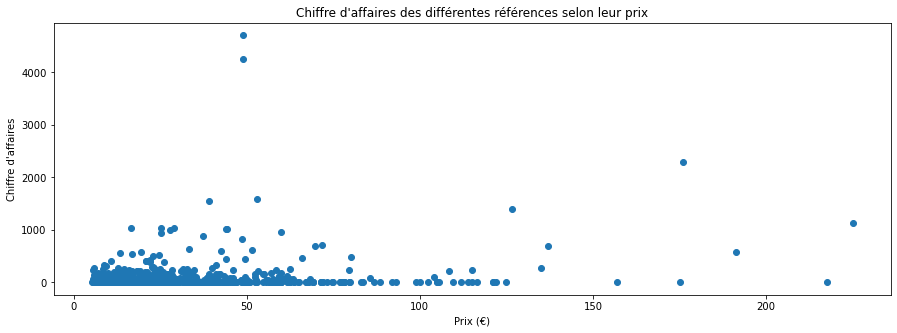

In [39]:
plt.figure(figsize=(15,5))
plt.title('Chiffre d\'affaires des différentes références selon leur prix')
plt.xlabel('Prix (€)')
plt.ylabel('Chiffre d\'affaires')
plt.scatter(erp_web['price'], erp_web['CA_par_pdt'])
plt.show()

>## Chiffre d'affaires total:

In [40]:
CA = erp_web['CA_par_pdt'].sum()
print('Le chiffre d\'affaires en ligne total est de: {:.2f} euros'.format(CA))

Le chiffre d'affaires en ligne total est de: 70568.60 euros


>## Outliers:

In [41]:
print(erp_web['price'].max())
print(erp_web['price'].min())

225.0
5.2


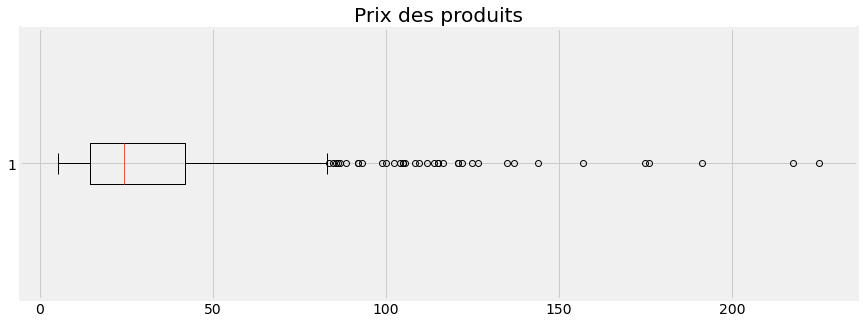

In [42]:
plt.figure(figsize=(15,5))
plt.style.use("fivethirtyeight")
plt.title('Prix des produits')
plt.boxplot(erp_web.price, vert=False)
plt.show()

>>#### Méthode IQR: 

In [43]:
Q1 = erp_web['price'].quantile(0.25)
Q3 = erp_web['price'].quantile(0.75)
IQR = Q3-Q1
au_dessus = Q3 + 1.5 * IQR

outliers_prices_iqr = erp_web.loc[erp_web['price'] > au_dessus, ['price', 'total_sales', 'post_title']]
print('Valeur limite pour les outliers (méthode IQR): {:.2f} euros'.format(au_dessus))

Valeur limite pour les outliers (méthode IQR): 83.10 euros


In [44]:
outliers_prices_iqr.shape

(37, 3)

In [45]:
outliers_prices_iqr.sort_values('price', ascending=False)

,price,total_sales,post_title
291,225.0,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008
525,217.5,0.0,David Duband Charmes-Chambertin Grand Cru 2014
692,191.3,3.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...
310,176.0,13.0,Cognac Frapin VIP XO
657,175.0,0.0,Camille Giroud Clos de Vougeot 2016
313,157.0,0.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...
30,144.0,NaN,NaN
478,137.0,5.0,Domaine Des Croix Corton Charlemagne Grand Cru...
752,135.0,2.0,Champagne Gosset Célébris Vintage 2007
293,126.5,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs


##### <font color='green'> On trouve 4 références avec les données manquantes parmi les outliers. Les 33 autres références désignent des Rieslings, des Champagnes, des Cognacs, des whiskies, des grands crus. Les prix constatés n'ont rien d'aberrants pour ce type de produits. Les outliers doivent être conservés.  </font>

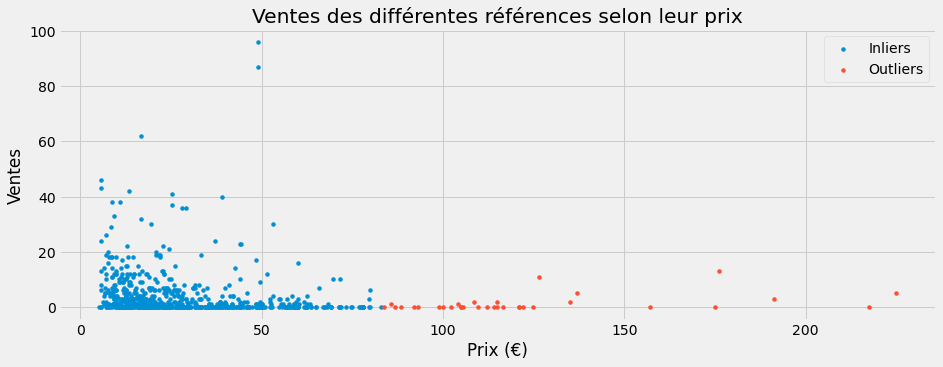

In [46]:
inliers = erp_web.loc[erp_web['price'] <= au_dessus, ['price', 'total_sales']]
plt.figure(figsize=(14,5))
plt.title('Ventes des différentes références selon leur prix')
plt.xlabel('Prix (€)')
plt.ylabel('Ventes')
plt.scatter(inliers.price, inliers.total_sales, s=15)
plt.scatter(outliers_prices_iqr.price, outliers_prices_iqr.total_sales, s=15)
plt.legend(["Inliers", "Outliers"])
plt.show()

>>#### Méthode z-score:

In [47]:
from scipy.stats import zscore

In [48]:
erp_web['Price zscore'] = zscore(erp_web['price'])

In [49]:
outliers_prices_z = erp_web.loc[abs(erp_web['Price zscore'])>2,'price']

In [50]:
outliers_prices_z.shape

(34,)

In [51]:
# z_score = (i-mean)/std donc
# 2 = (i-mean)/std
# i = (2 + mean / std) *std
print('Valeur limite pour les outliers (méthode z-score): {:.2f} euros'.format((2+(erp_web['price'].mean()/erp_web['price'].std()))*erp_web['price'].std()))

Valeur limite pour les outliers (méthode z-score): 86.01 euros


>## Optionnel:

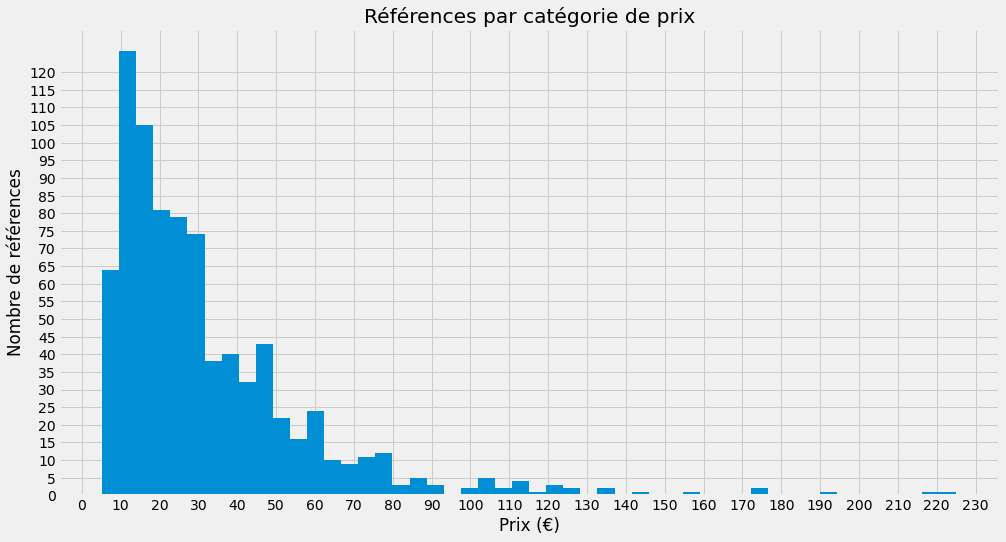

In [52]:
plt.figure(figsize=(15,8))
plt.hist(erp_web['price'], bins=50)
plt.xticks([10*i for i in range(24)])
plt.yticks ([5*i for i in range(25)])
plt.title('Références par catégorie de prix')
plt.xlabel('Prix (€)')
plt.ylabel('Nombre de références')
plt.show()